#**import** **library**


In [2]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB


Load Datasets

```
**# This is formatted as code**
```
#Load Datasets


In [15]:
# Membuat dataset Iris dari scikit-learn dan mengonversi ke DataFrame
from sklearn.datasets import load_iris
import pandas as pd

# Memuat dataset Iris
iris = load_iris()
x = iris.data    # Merupakan input untuk machine learning
y = iris.target  # Merupakan output yang diinginkan oleh machine learning

# Melakukan konversi data fitur dan target menjadi DataFrame
df_x = pd.DataFrame(x, columns=iris.feature_names)
df_y = pd.Series(y, name='target')  # Menggunakan huruf besar pada 'Series'

# Menggabungkan fitur dan target dalam satu DataFrame
df = pd.concat([df_x, df_y], axis=1)

# Menampilkan 13 baris pertama dari dataset
df.head(13)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


# **CEK DATASETS**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


# **SPLIT** **DATA**


In [14]:
[46] #split dataset menjadi training dan testing
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=20)

# **LIST MODEL MACHINE LEARNING**

In [18]:
#list model yang akan diuji
models = {
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB()
}

# **MELATIH DAN MEMPREDIKSI MODEL**

In [19]:
results = []
for name, model in models.items():
    model.fit(X_train, y_train)  # Melatih model
    y_pred = model.predict(X_test)  # Memprediksi data uji
    acc = accuracy_score(y_test, y_pred)
    results.append((name, acc))
    print(f"Model: {name}")
    print(classification_report(y_test, y_pred, target_names=data.target_names))
    print("-" * 50)


Model: Logistic Regression
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.85      1.00      0.92        11
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

--------------------------------------------------
Model: Decision Tree
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       0.85      1.00      0.92        11
   virginica       1.00      0.82      0.90        11

    accuracy                           0.93        30
   macro avg       0.95      0.94      0.94        30
weighted avg       0.94      0.93      0.93        30

--------------------------------------------------
Model: Random Forest
              precision    recall  f1-score   support

      setosa

# **PERBANDINGAN AKURASI**

In [20]:
results_df = pd.DataFrame(results, columns=["Model", "Accuracy"])
print("\nPerbandingan Akurasi Model:")
print(results_df)


Perbandingan Akurasi Model:
                 Model  Accuracy
0  Logistic Regression  0.933333
1        Decision Tree  0.933333
2        Random Forest  0.933333
3                  SVM  1.000000
4                  KNN  0.966667
5          Naive Bayes  0.933333


# **VISUALISASI DATA**

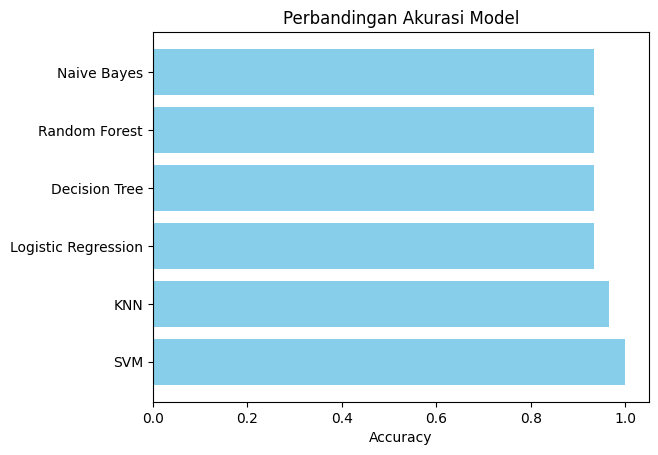

In [21]:
import matplotlib.pyplot as plt
results_df.sort_values(by="Accuracy", ascending=False, inplace=True)
plt.barh(results_df["Model"], results_df["Accuracy"], color="skyblue")
plt.xlabel("Accuracy")
plt.title("Perbandingan Akurasi Model")
plt.show()